In [330]:
# standar libraries
import pandas as pd
import numpy as np
import random
import axelrod as axl

In [331]:
# visualise library
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns

In [332]:
# stats libraries
import statsmodels.formula.api as sm
from scipy.stats.stats import pearsonr

In [ ]:
# read the file 
data = pd.read_csv("/home/nikoleta/src/jobs/data/Lattice_50_players.csv")

1 : Illustrate who interacts with who. Circular Graph
2 : Ranks of players 
3 : Most Wins. Barplot
4 : who did not win
5 : freq vs player


3 : Score per turn against time of participations
4 : Percentage. Times played against times won

6 : rank vs player
7 : sc0re vs player


In [334]:
len(data) # lenght / 5 = how many different tournaments 

50000

In [335]:
print(data['parameter'].unique(), data['seed'].unique()) # can understand the tournament we runned from here

[0 1 2 3 4 5 6 7 8 9] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [336]:
# currently 132 in axelrod, see how many of them participated in the tournament
num_players = len(data.player_name.unique())
num_players # all strategies played at least once

132

In [337]:
participated = data.player_name.value_counts() # how many times each player played

In [338]:
players_ranking = pd.crosstab(data.player_name, data.ranking) # players and their ranks

In [339]:
av_score_by_player = pd.crosstab(data.average_score,data.player_name) # average score of each player

In [340]:
# some basic parameters for the graphs
players = [s() for s in axl.strategies]
names  = tuple(data['player_name'].unique())
nplayers = len(players)
width = max(nplayers / 3, 12)
height = width / 2
spacing = 4
positions = spacing * np.arange(1, nplayers + 1, 1)

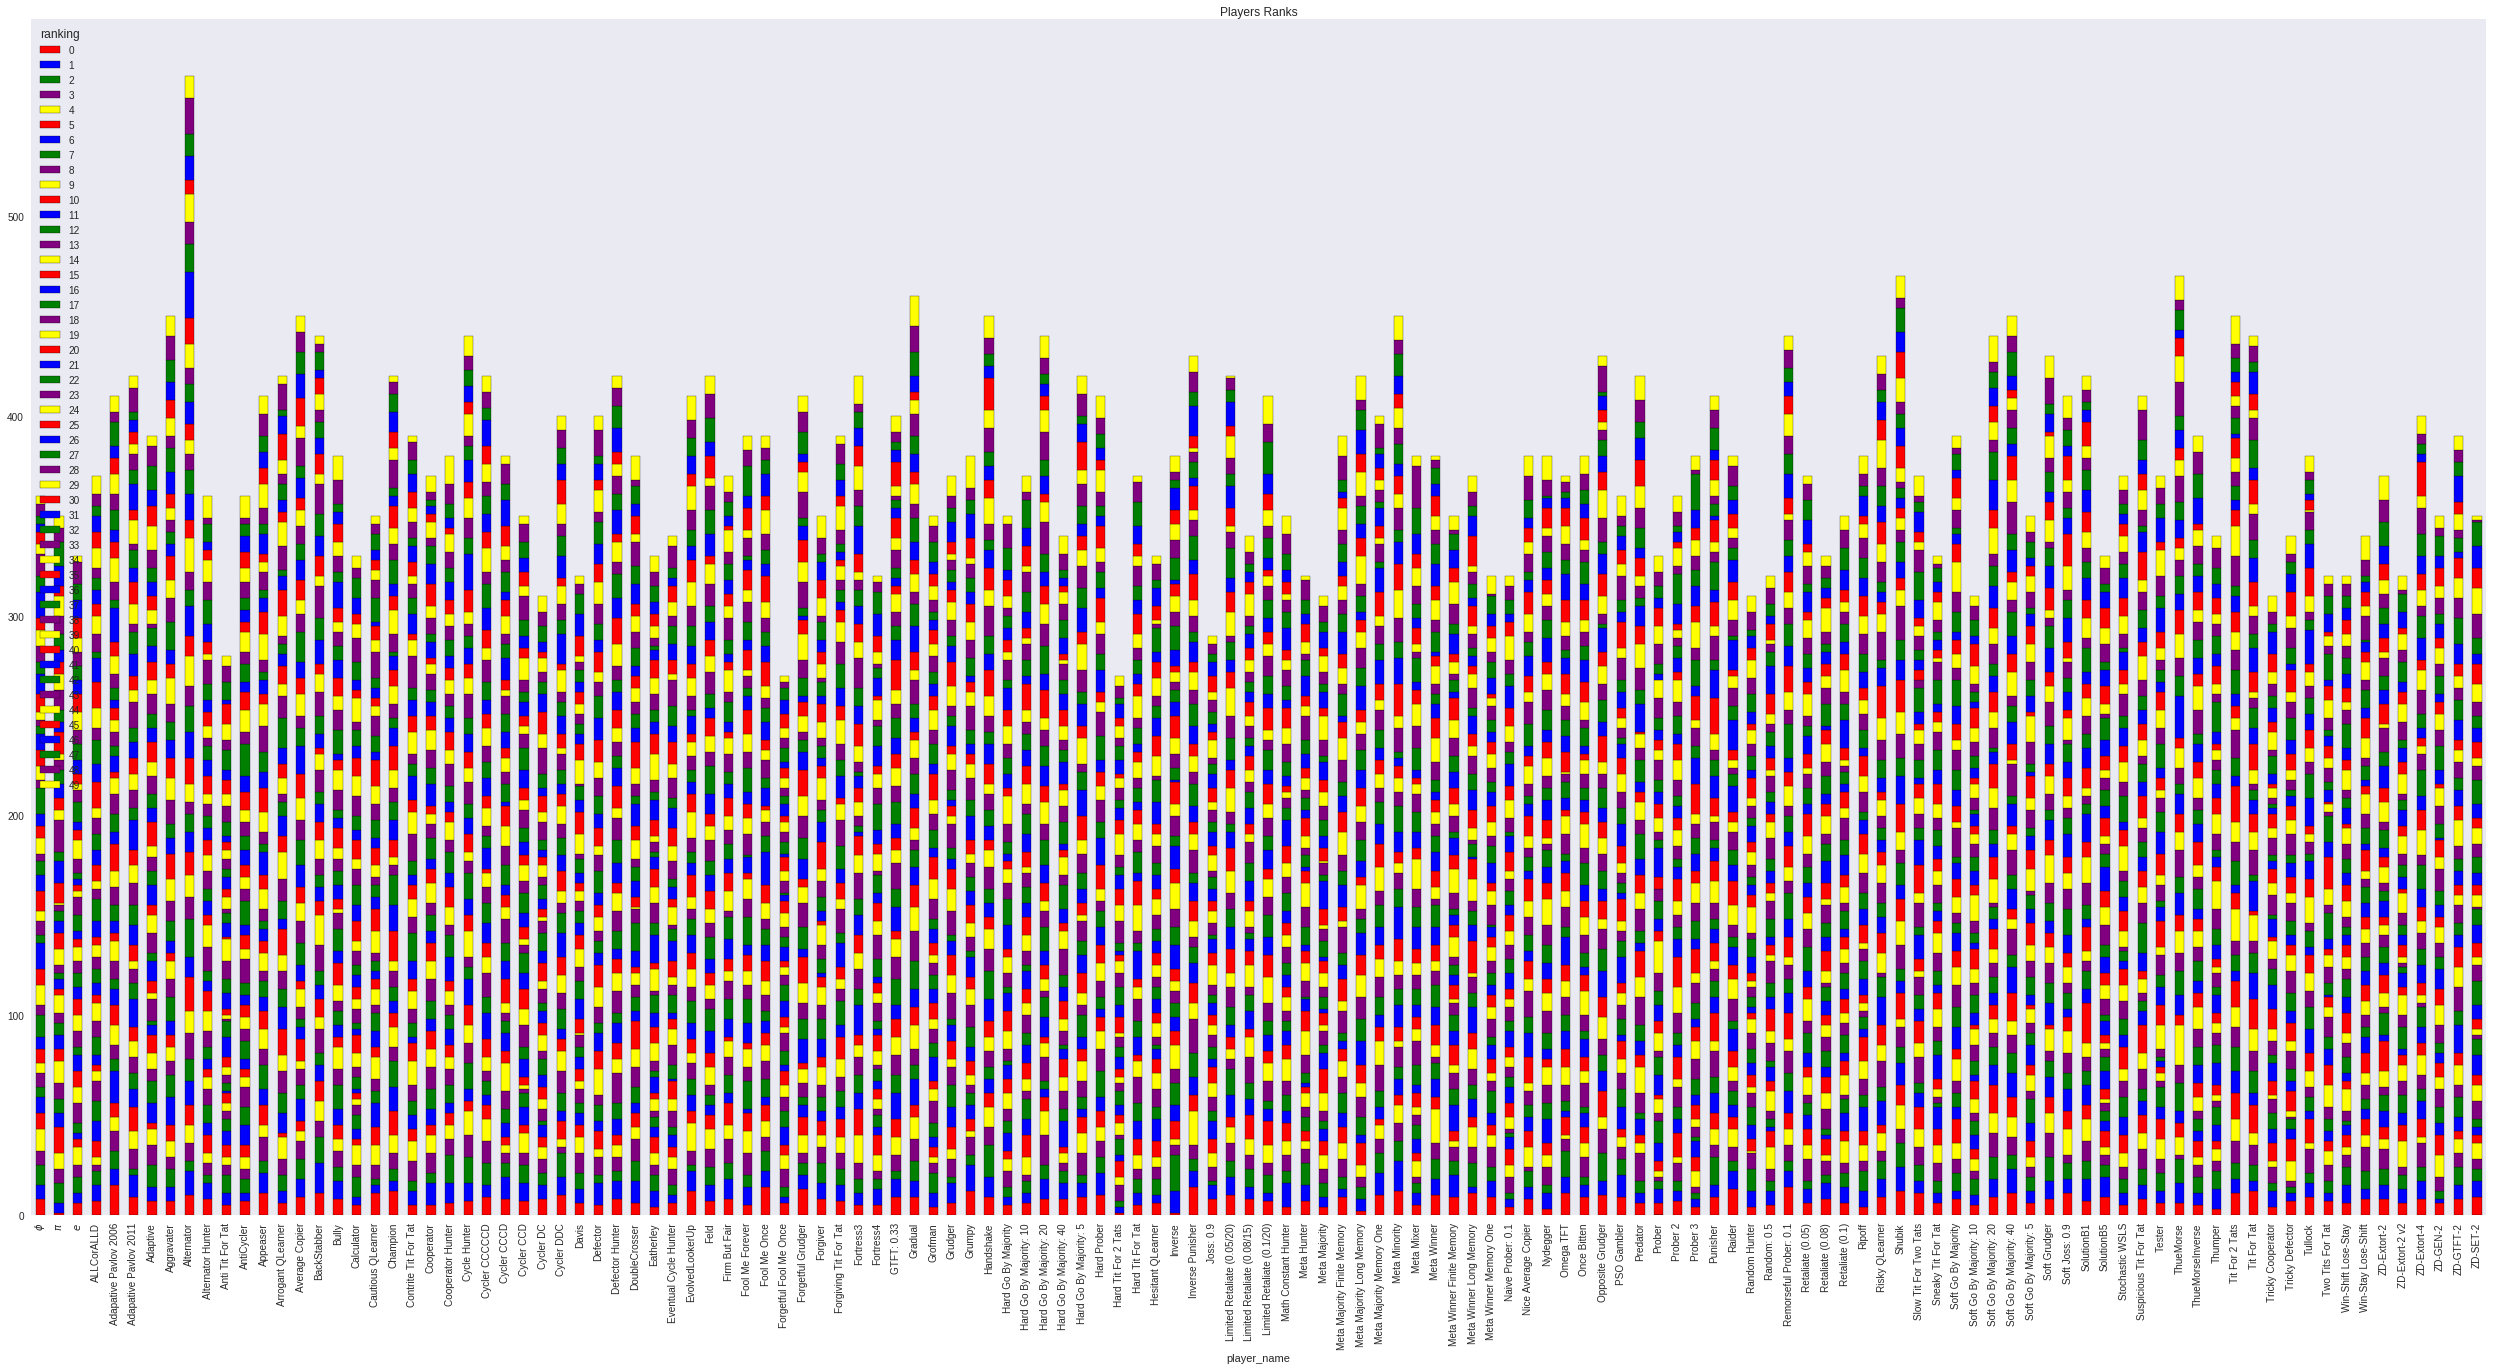

In [71]:
# 2 : players and their ranks
players_ranking.plot(kind='bar', stacked=True, color=['red','blue', 'green', 'purple', 'yellow'], 
                     grid=False, figsize=(width, height), title='Players Ranks')

In [343]:
temp = players_ranking[0] != 0
winning = players_ranking[0][temp]
winning.sort() 
winning

/home/nikoleta/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


player_name
Hard Tit For 2 Tats             1
$\pi$                           1
Inverse                         1
Meta Majority Long Memory       2
Thumper                         3
Nydegger                        3
Eatherley                       4
Prober 3                        4
Meta Majority                   4
Math Constant Hunter            4
Grofman                         4
Ripoff                          4
Tricky Cooperator               4
Naive Prober: 0.1               4
Random Hunter                   4
Defector                        5
Hard Go By Majority             5
Hard Tit For Tat                5
Fool Me Forever                 5
Stochastic WSLS                 5
ThueMorseInverse                5
Soft Go By Majority: 10         5
Meta Mixer                      5
Contrite Tit For Tat            5
Random: 0.5                     5
Fortress3                       5
Fortress4                       5
Anti Tit For Tat                5
Cooperator                      5
Ca

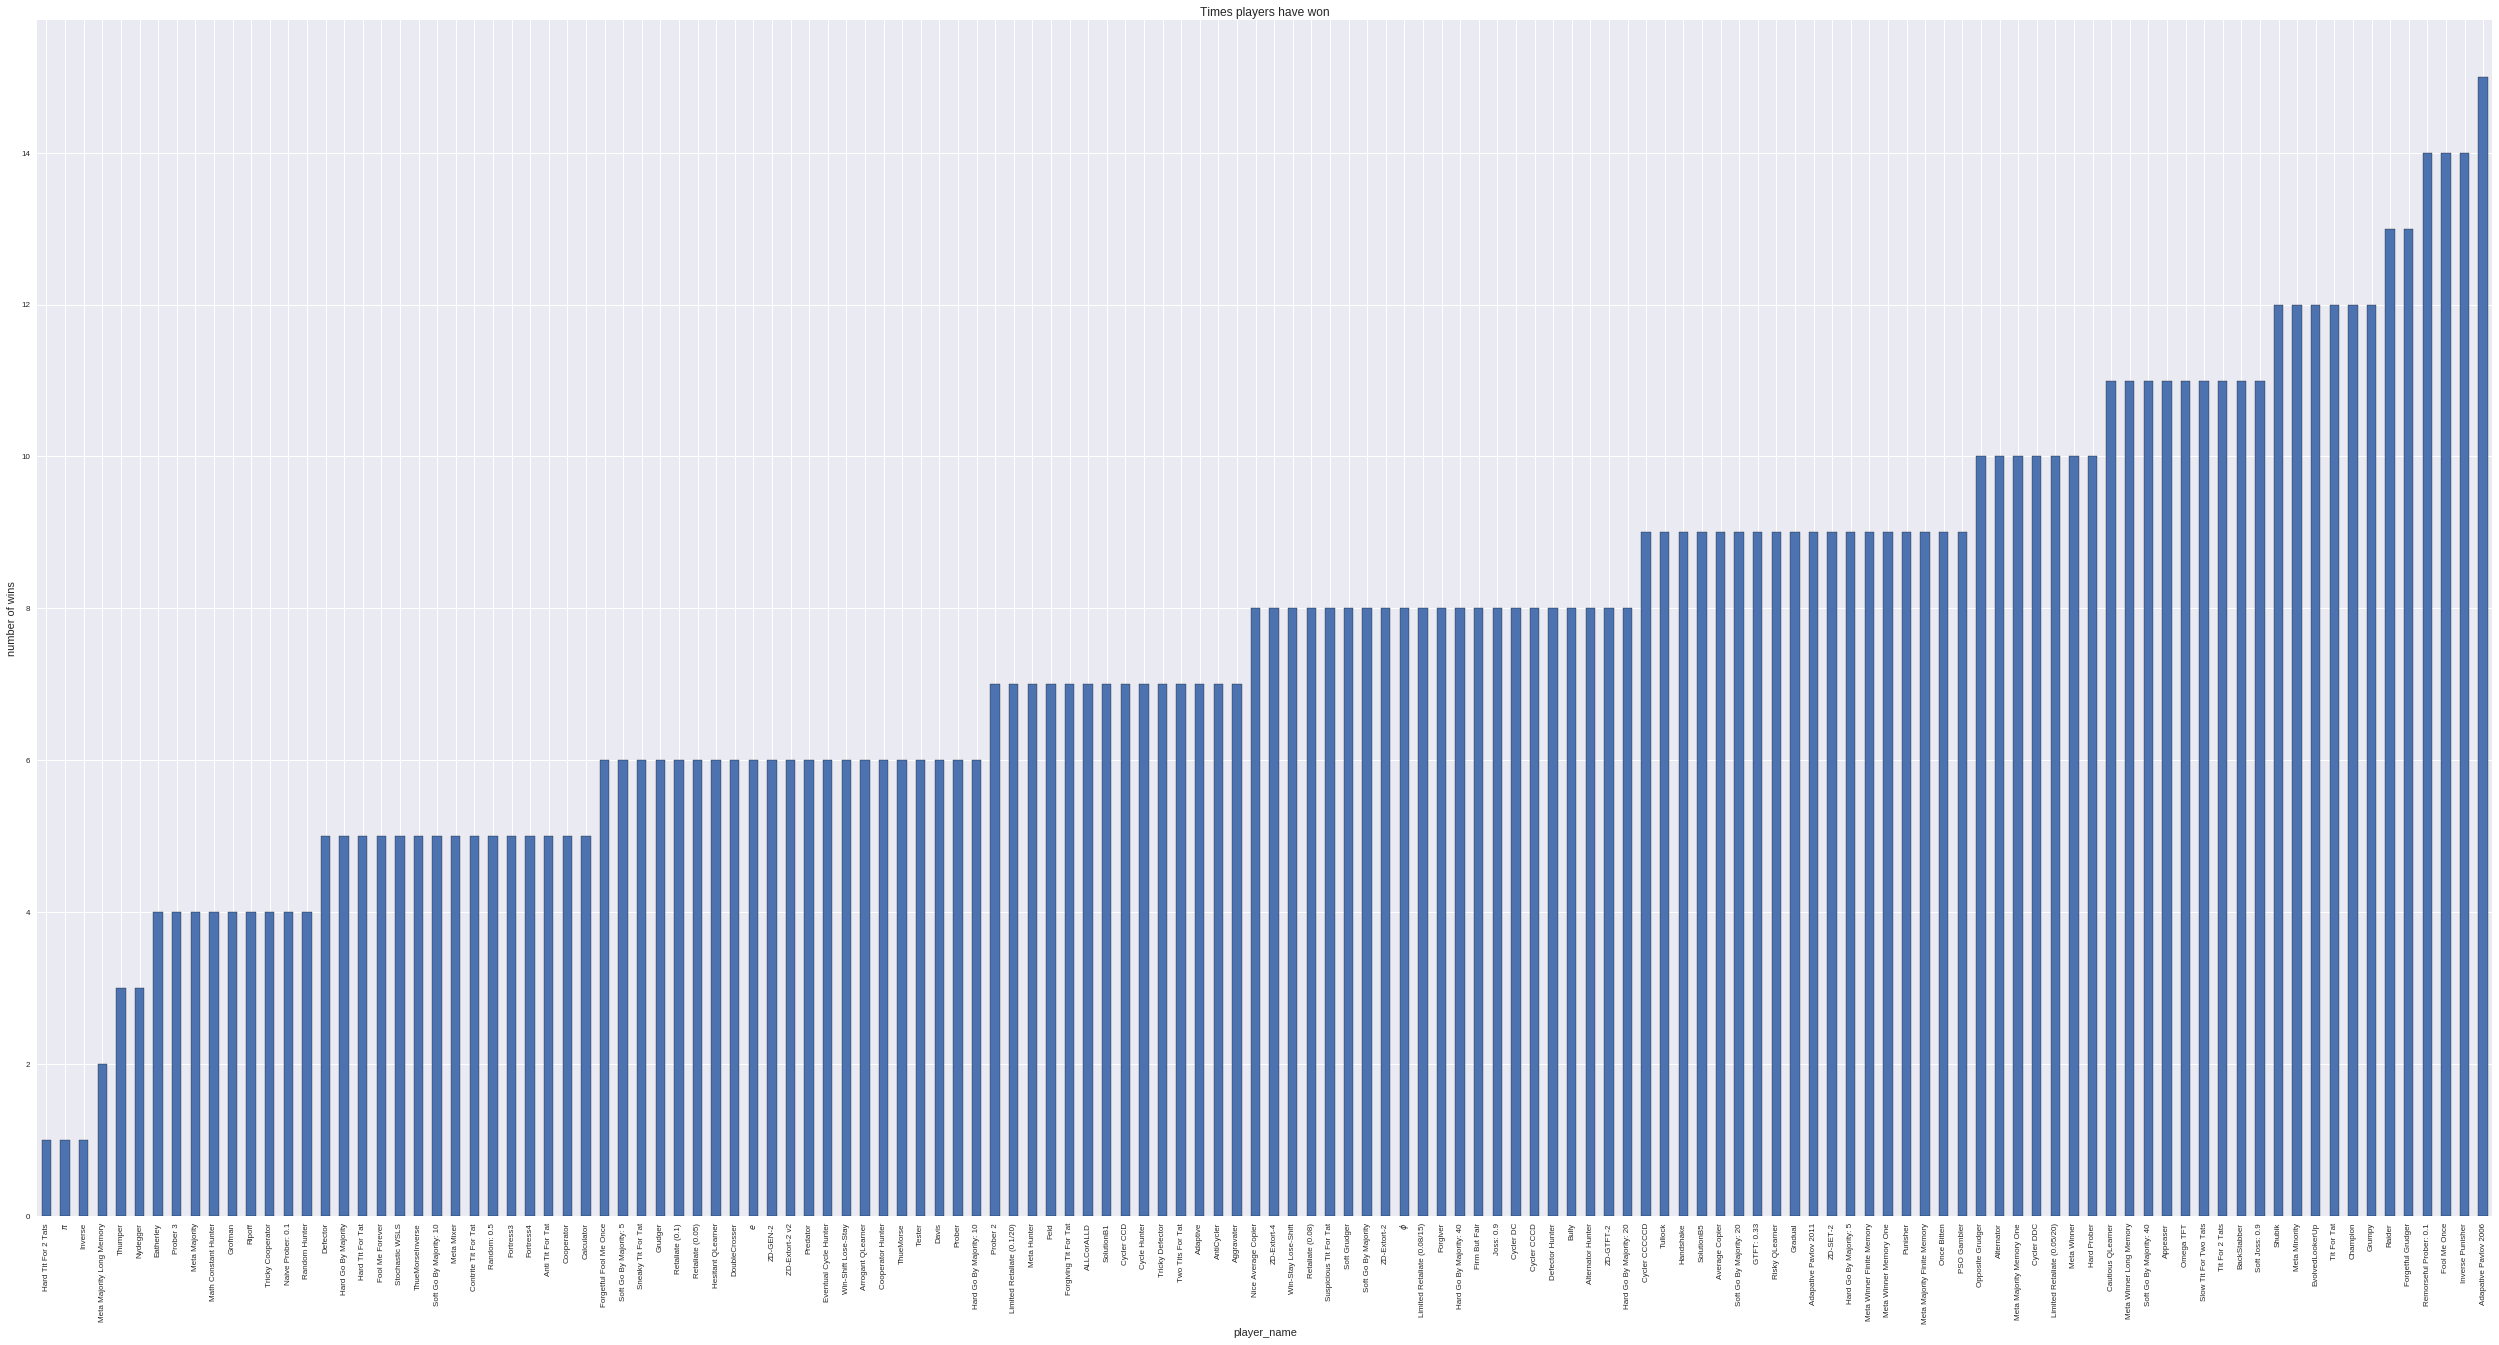

In [342]:
# 3 First ranks 
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, names, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
plot = winning.plot(kind='bar')

plt.ylabel('number of wins')
plt.title('Times players have won')
plt.savefig("/home/nikoleta/src/jobs/Analysis/winners.pdf", format='pdf')

In [347]:
# 4 : players that did not win
temp = players_ranking[0] == 0
never_won = players_ranking[0][temp]
never_won

Series([], Name: 0, dtype: int64)

In [348]:
data['freq'] = data.groupby(['player_name'])['seed'].transform('count')

In [349]:
freg = pd.value_counts(data['player_name'].values, sort=True)

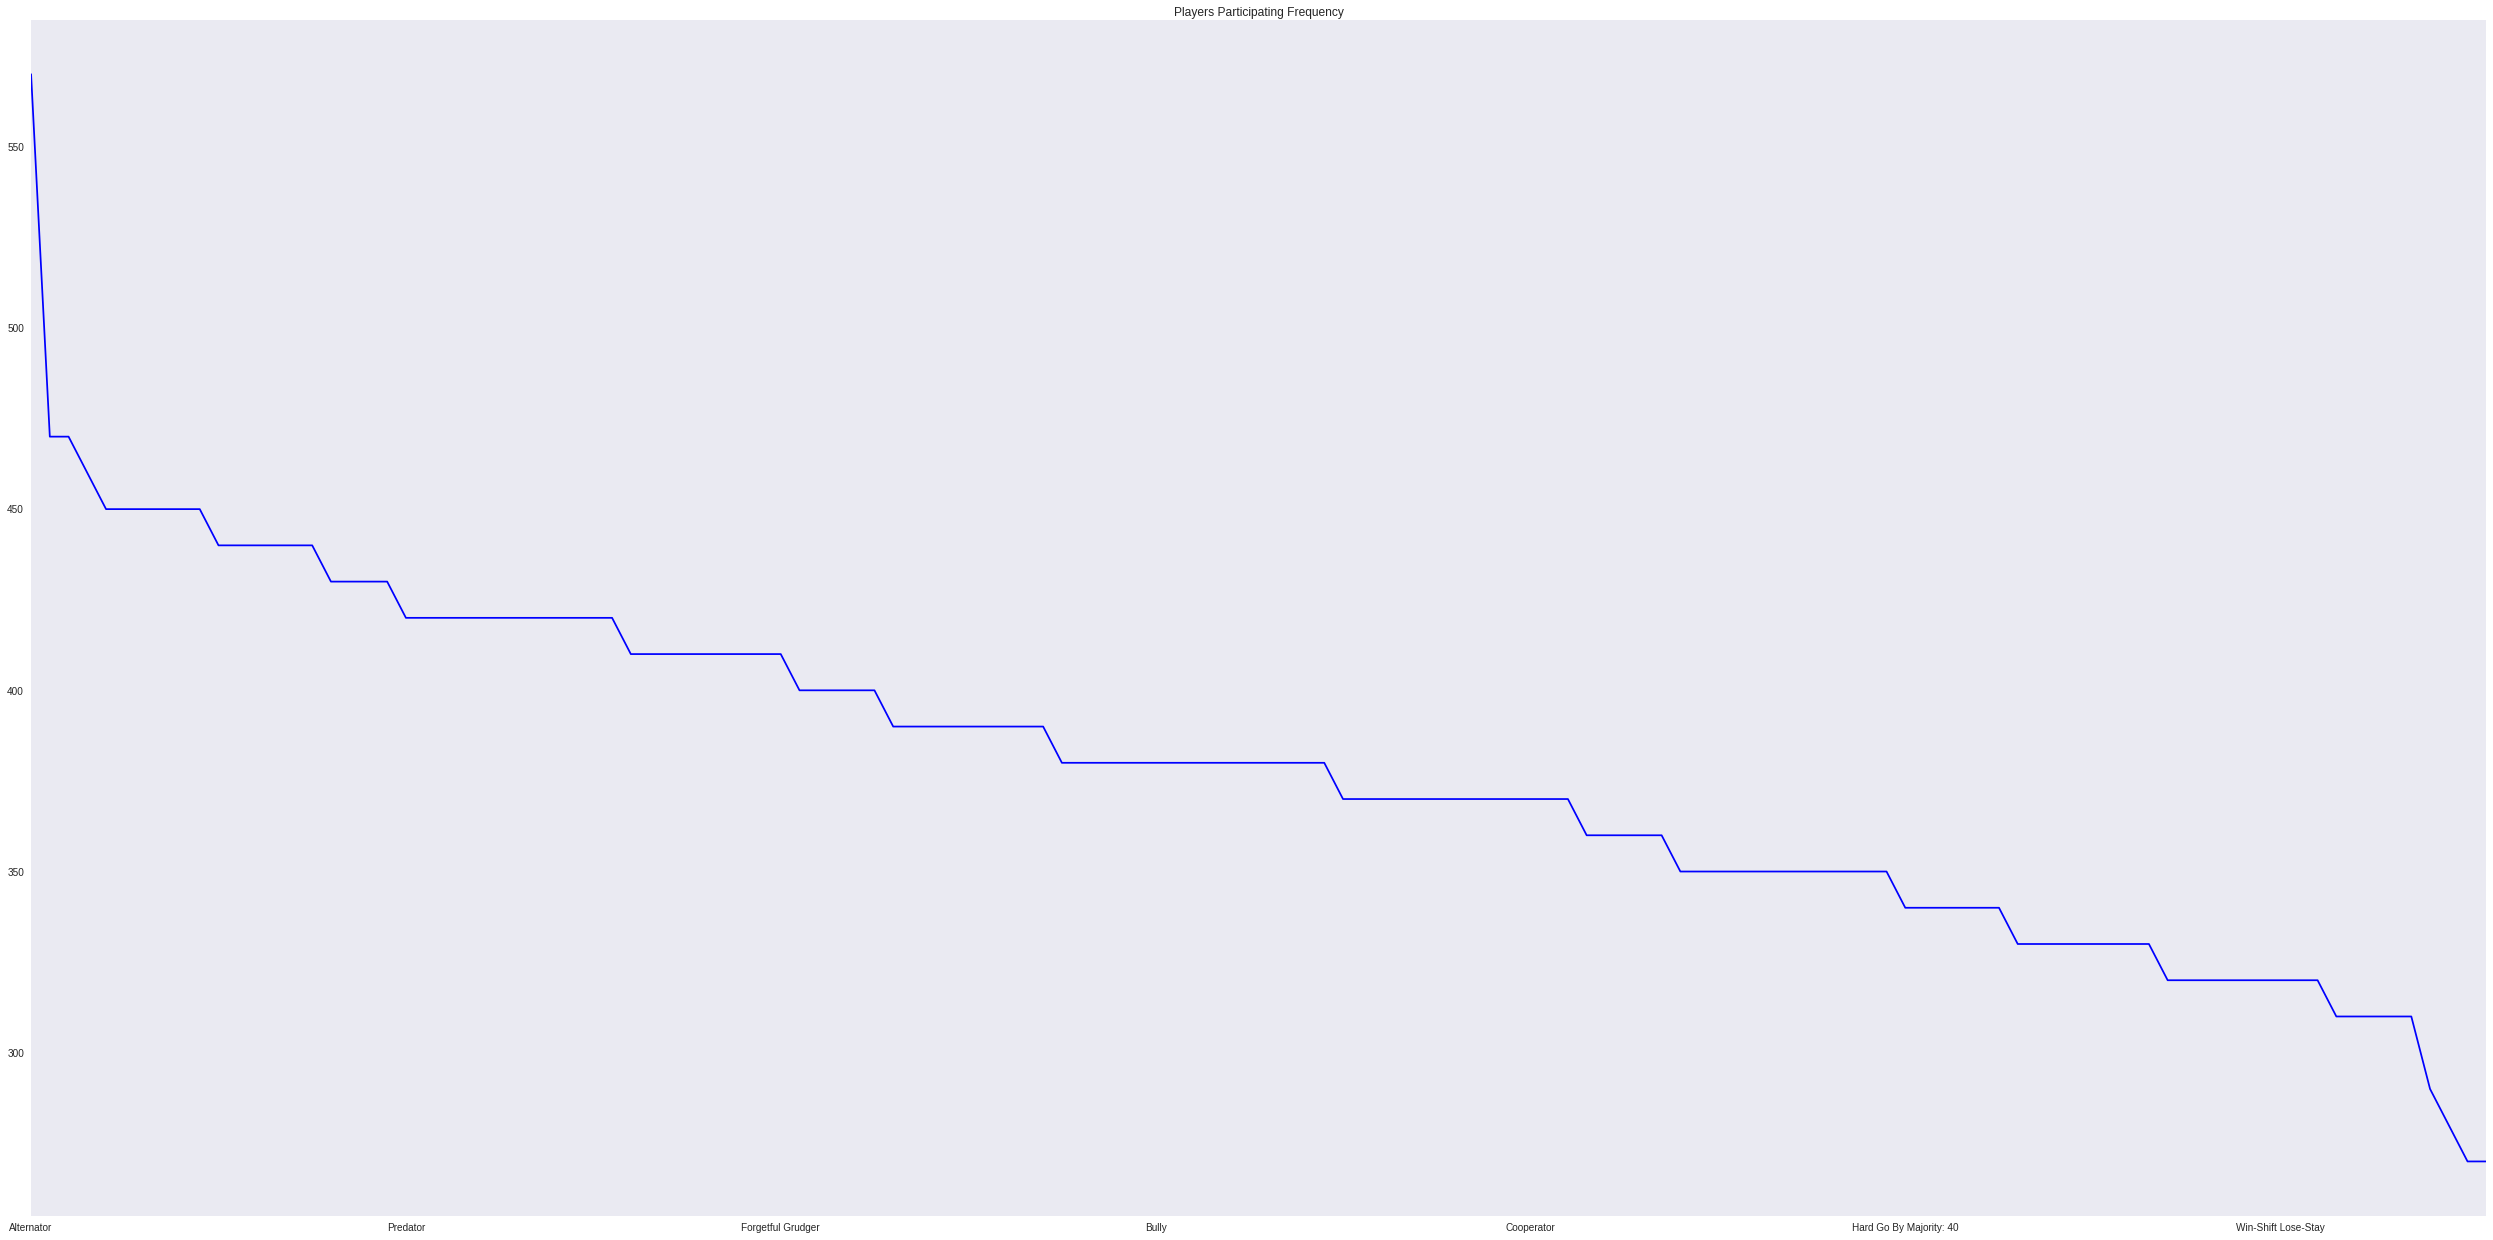

In [350]:
# 5 how many times each strategy played
plot = freg.plot(kind='line', stacked=True, color='blue',
                     grid=False, figsize=(width, height), title='Players Participating Frequency')
plt.savefig("/home/nikoleta/src/jobs/Analysis/lattice-frenquency.pdf", format='pdf')

In [351]:
# and a crosstable for this
table = []
for i in data['freq'].unique() : 
    table.append(data['player_name'][data['freq'] == i].unique())
frenquency = pd.DataFrame({'Frenquency' : [i for i in data['freq'].unique()] , 
                           'List of PLayers' : table})
table = frenquency.sort_values(by='Frenquency')
table.to_csv("/home/nikoleta/Desktop/Frenq_table.csv")

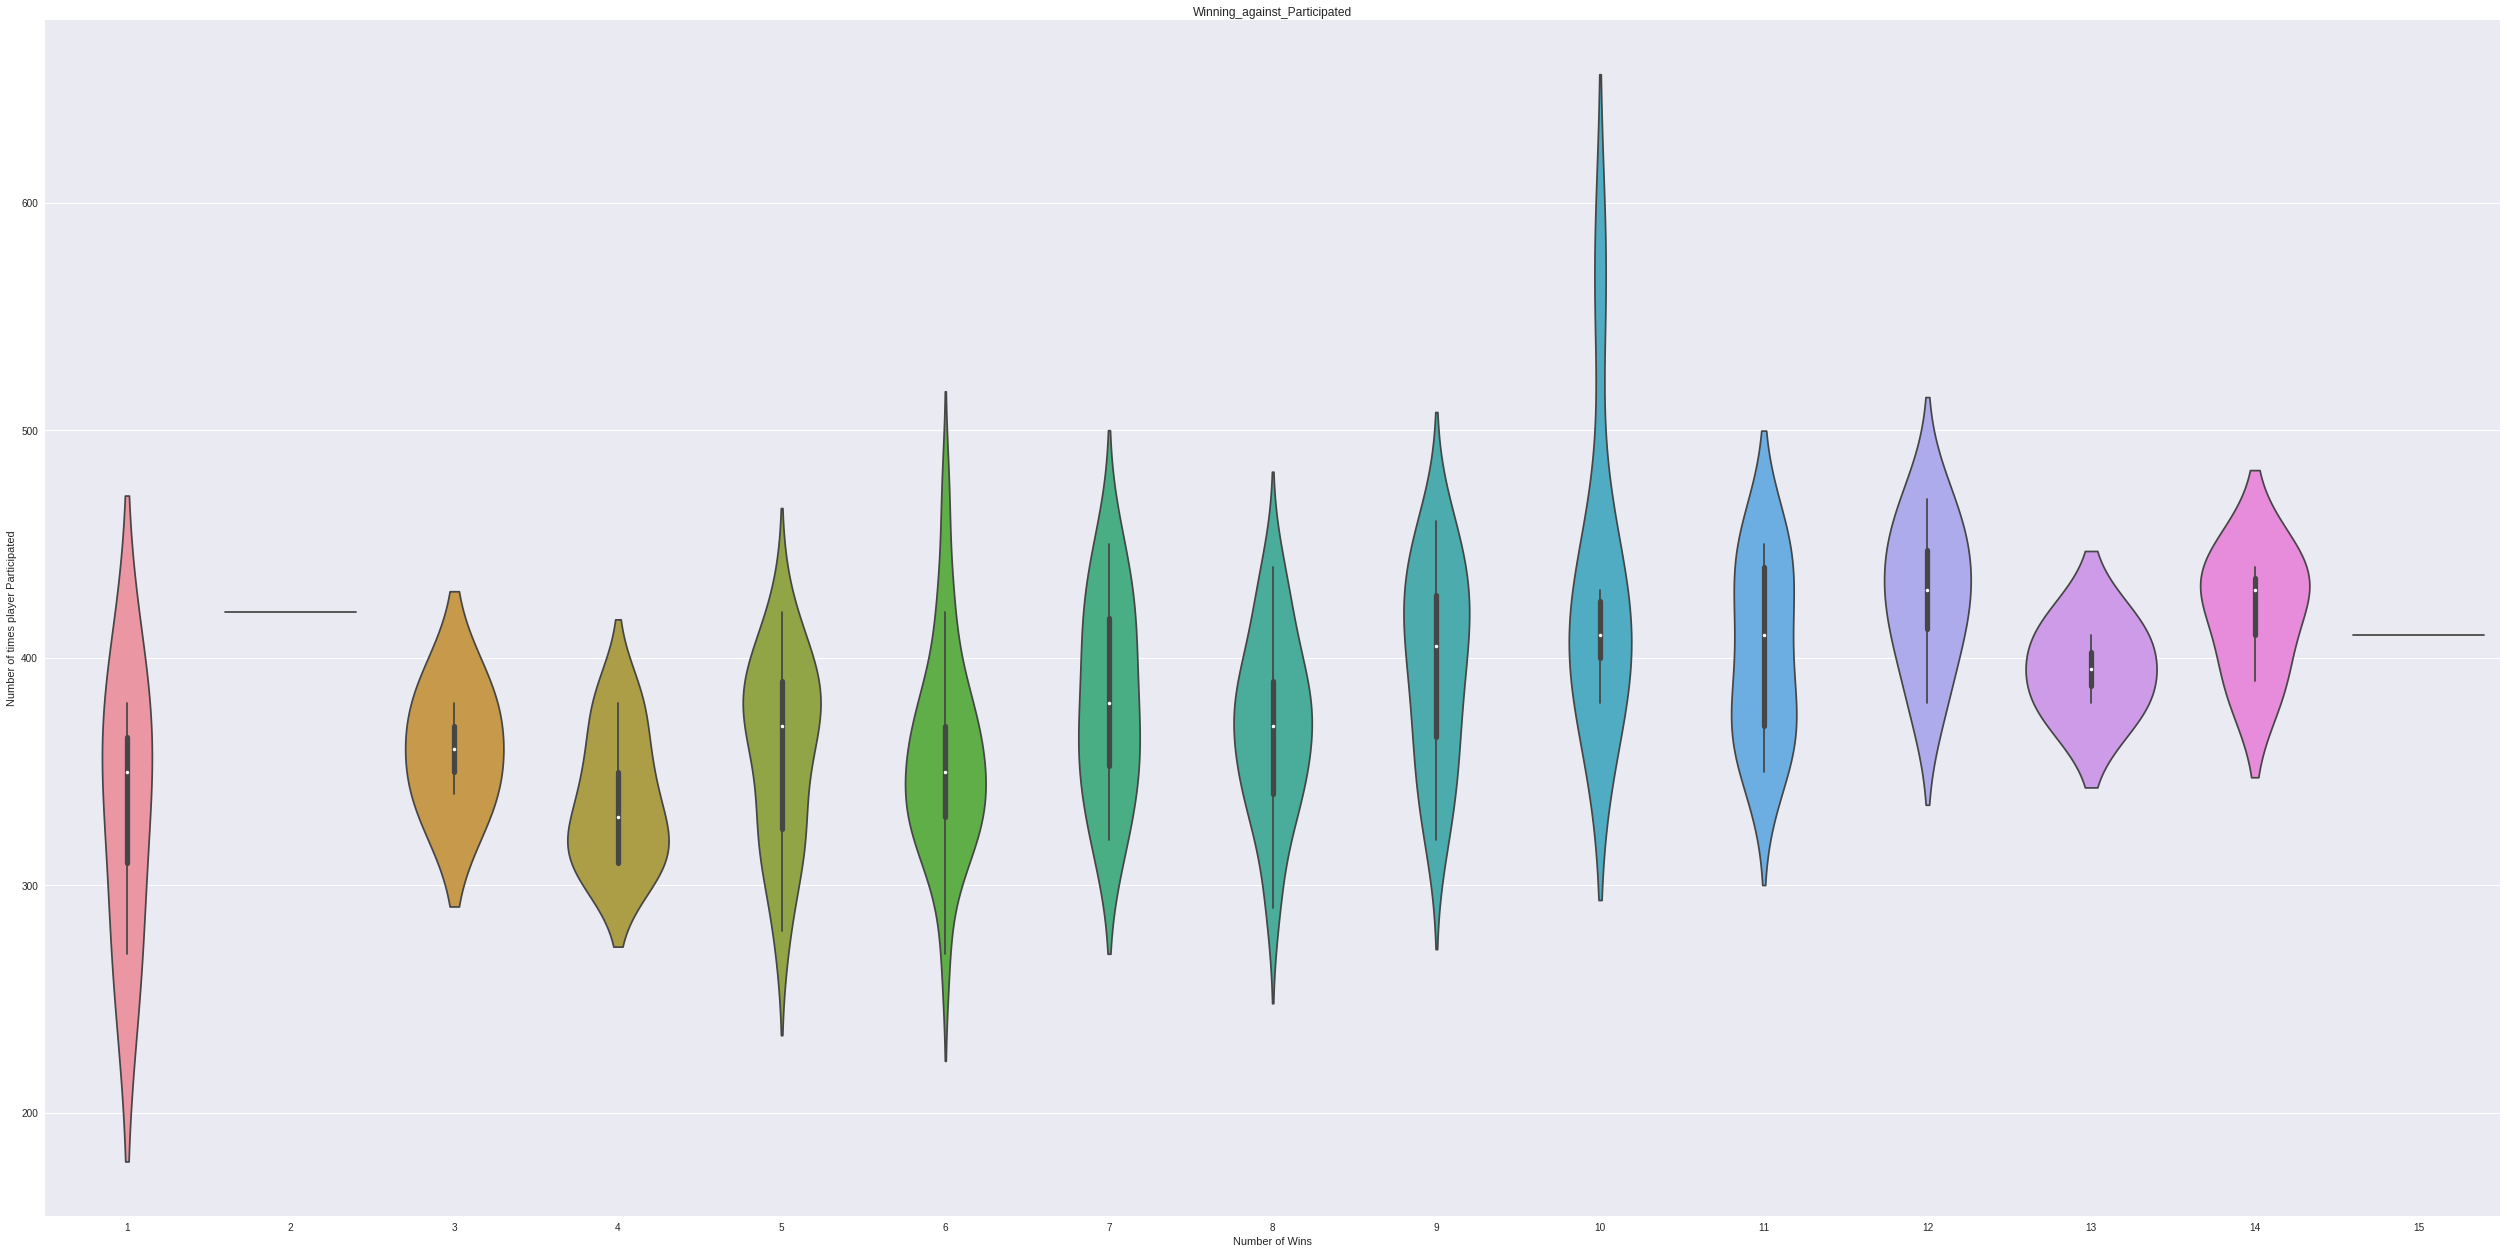

In [352]:
# participated vs number of wins

figure = plt.figure(figsize=(width, height))
plot = sns.violinplot(winning, participated) # violin plot
plt.xlabel('Number of Wins')
plt.ylabel('Number of times player Participated')
plt.title('Winning_against_Participated')
plt.savefig("/home/nikoleta/src/jobs/Analysis/lattice-participated_wins.pdf", format='pdf')

In [353]:
table = pd.crosstab(data['freq'], data['ranking']).apply(lambda r: r/r.sum(), axis=1)
table.to_csv("/home/nikoleta/Desktop/percentage.csv")

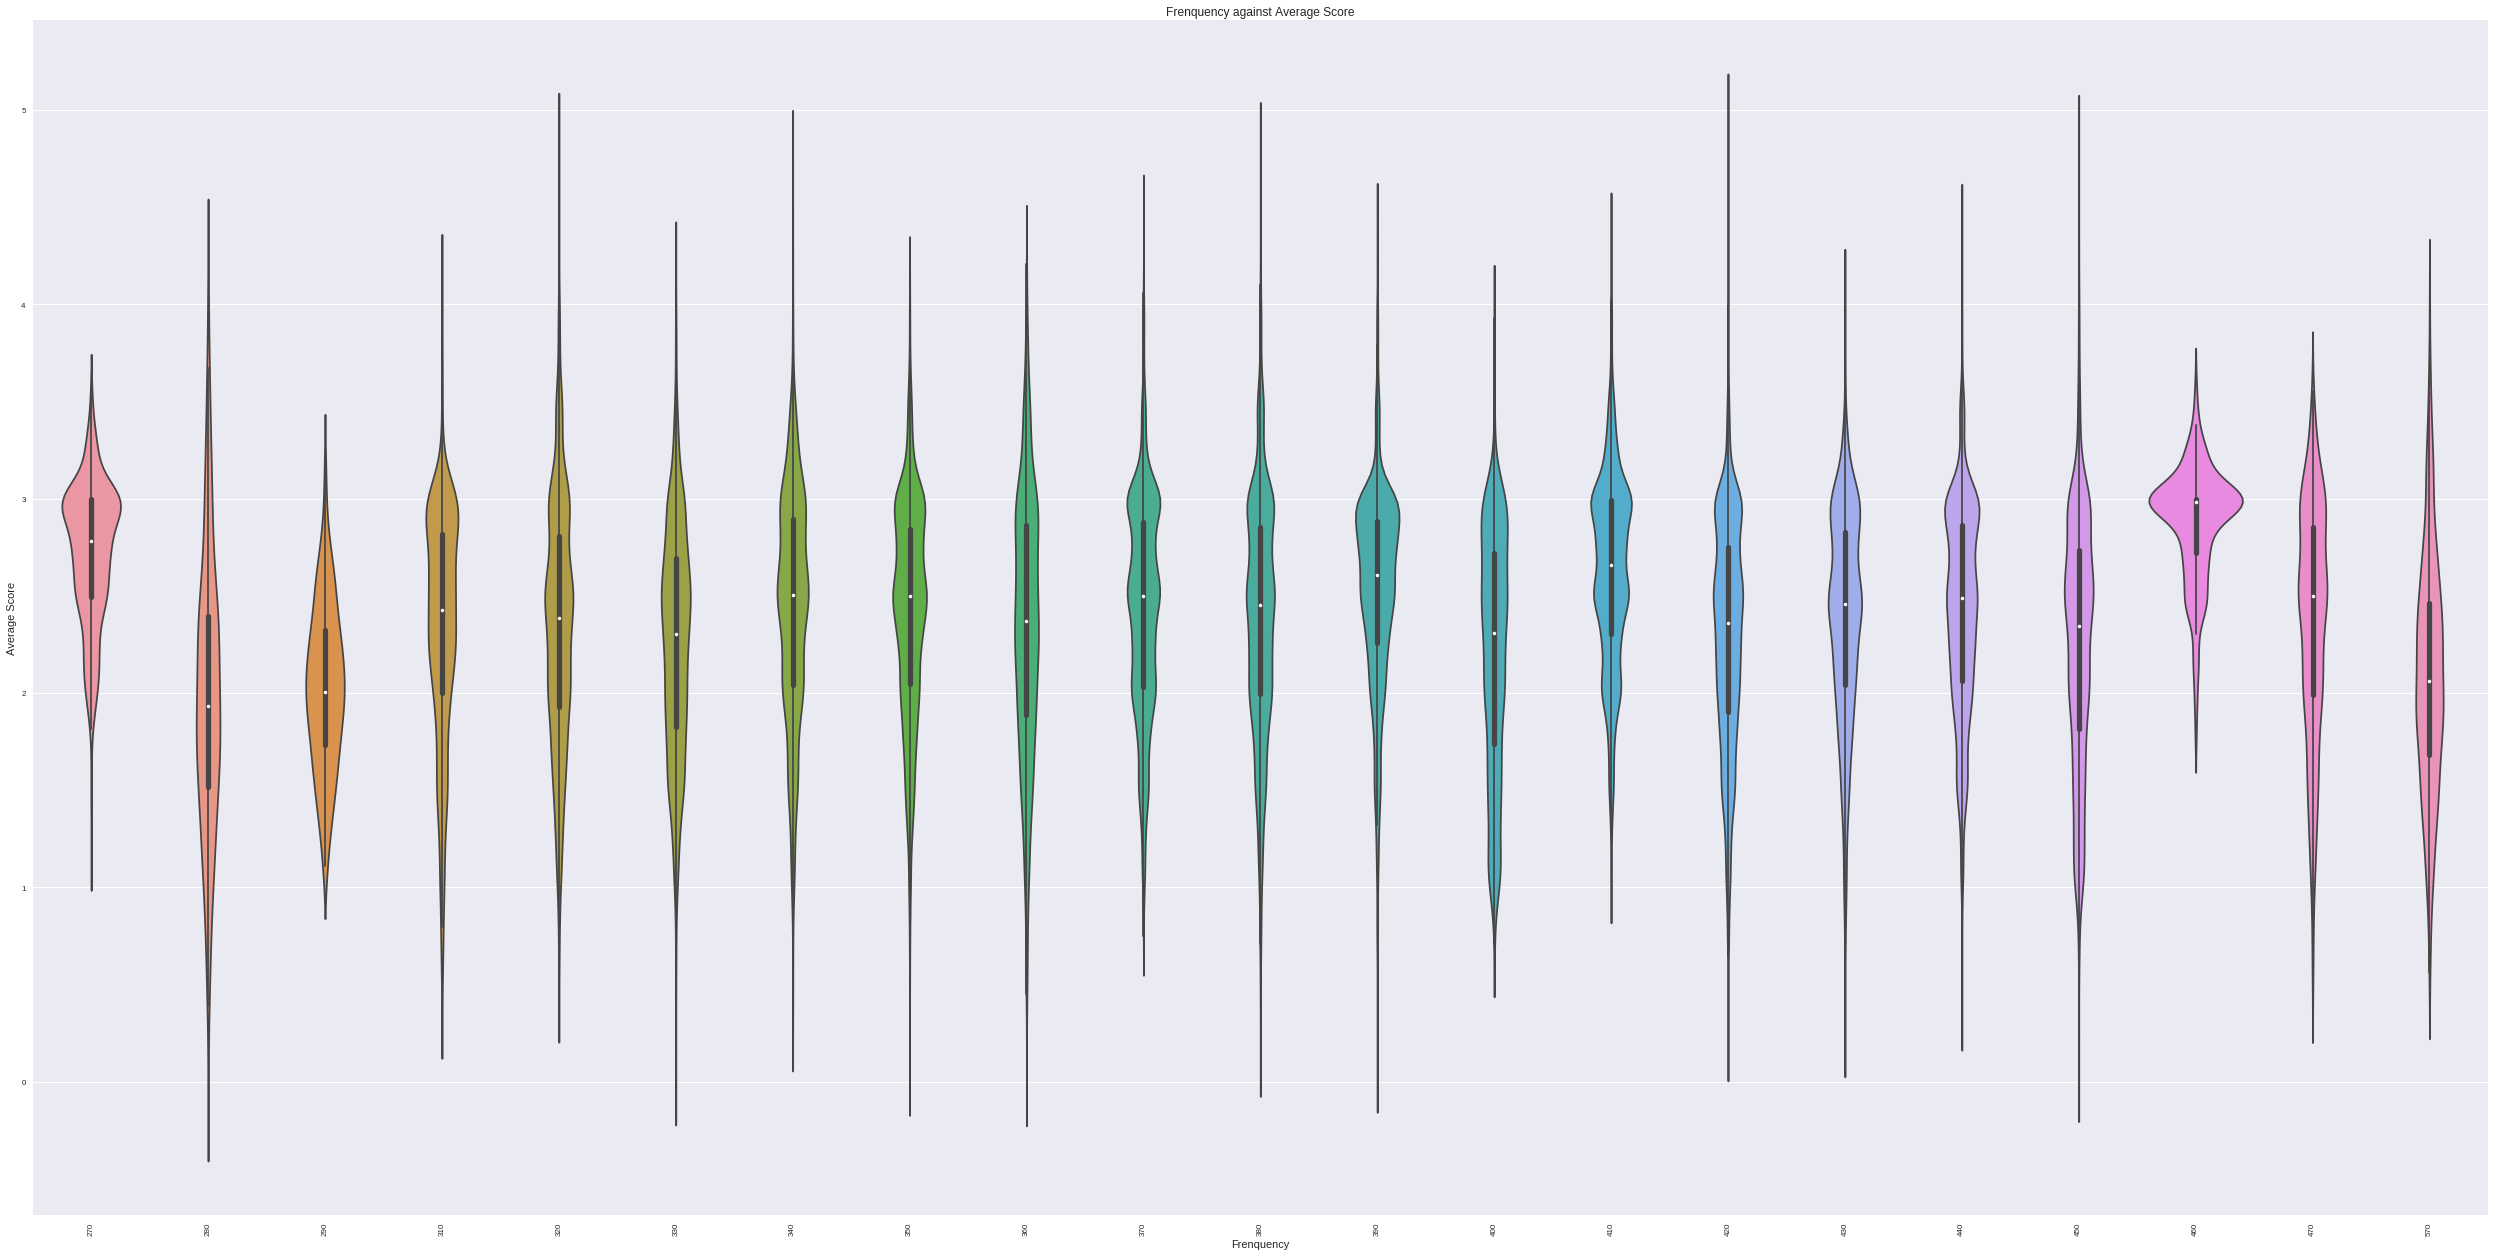

In [354]:
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, names, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
sns.violinplot(x=data['freq'],y=data['average_score'])

plt.xlabel('Frenquency')
plt.ylabel('Average Score')
plt.title('Frenquency against Average Score')
plt.savefig("/home/nikoleta/src/jobs/Analysis/lattice-Frenquency.pdf", format='pdf')

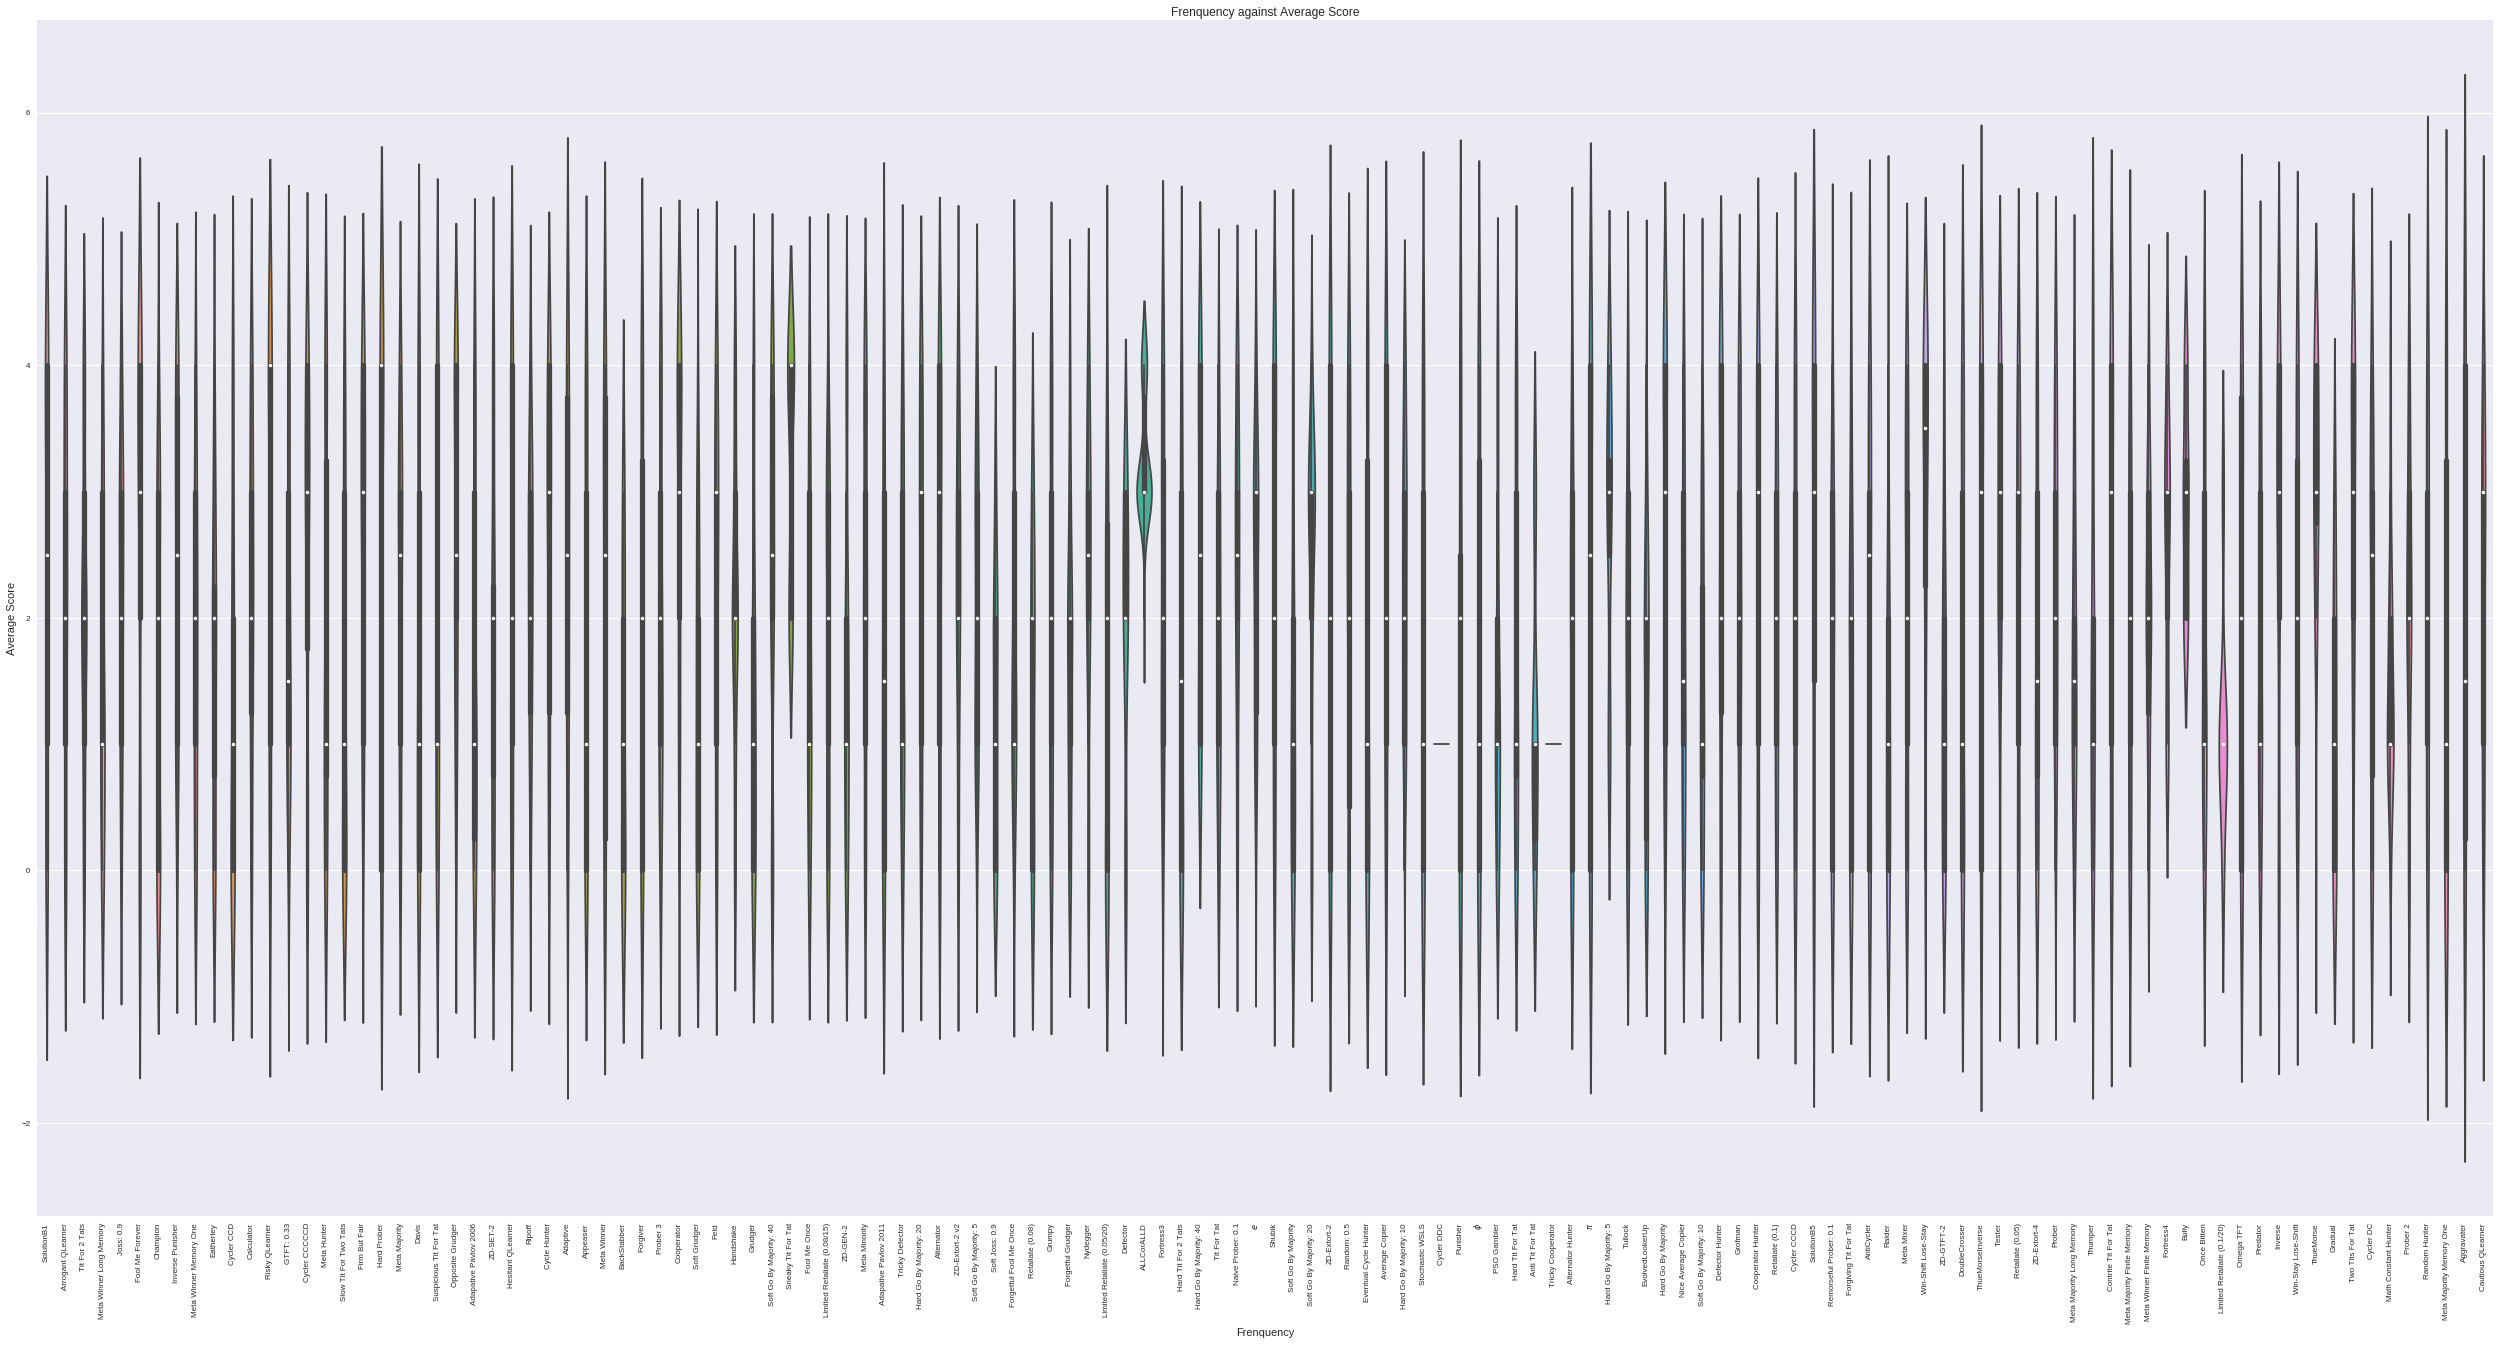

In [335]:
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, names, rotation=90)
plt.xlim(0, spacing * (nplayers + 1))
plt.tick_params(axis='both', which='both', labelsize=8)
sns.violinplot(x=data['player_name'],y=data['ranking'])

plt.xlabel('Frenquency')
plt.ylabel('Average Score')
plt.title('Frenquency against Average Score')

In [322]:
names = data['player_name'].unique()
names_first = names[0:33]
names_second = names[33:66]
names_third = names[66:99]
names_fourth = names[99:132]

In [207]:
#averages = list(data.groupby('player_name')['average_score'].unique())
#averages
violin = pd.DataFrame({'Names': data['player_name'], 'Averages': data['average_score']})
#violin = violin.sort_values(by='Names')
#sns.violinplot(y=averages)
temp = violin.sort_values(by='Names')


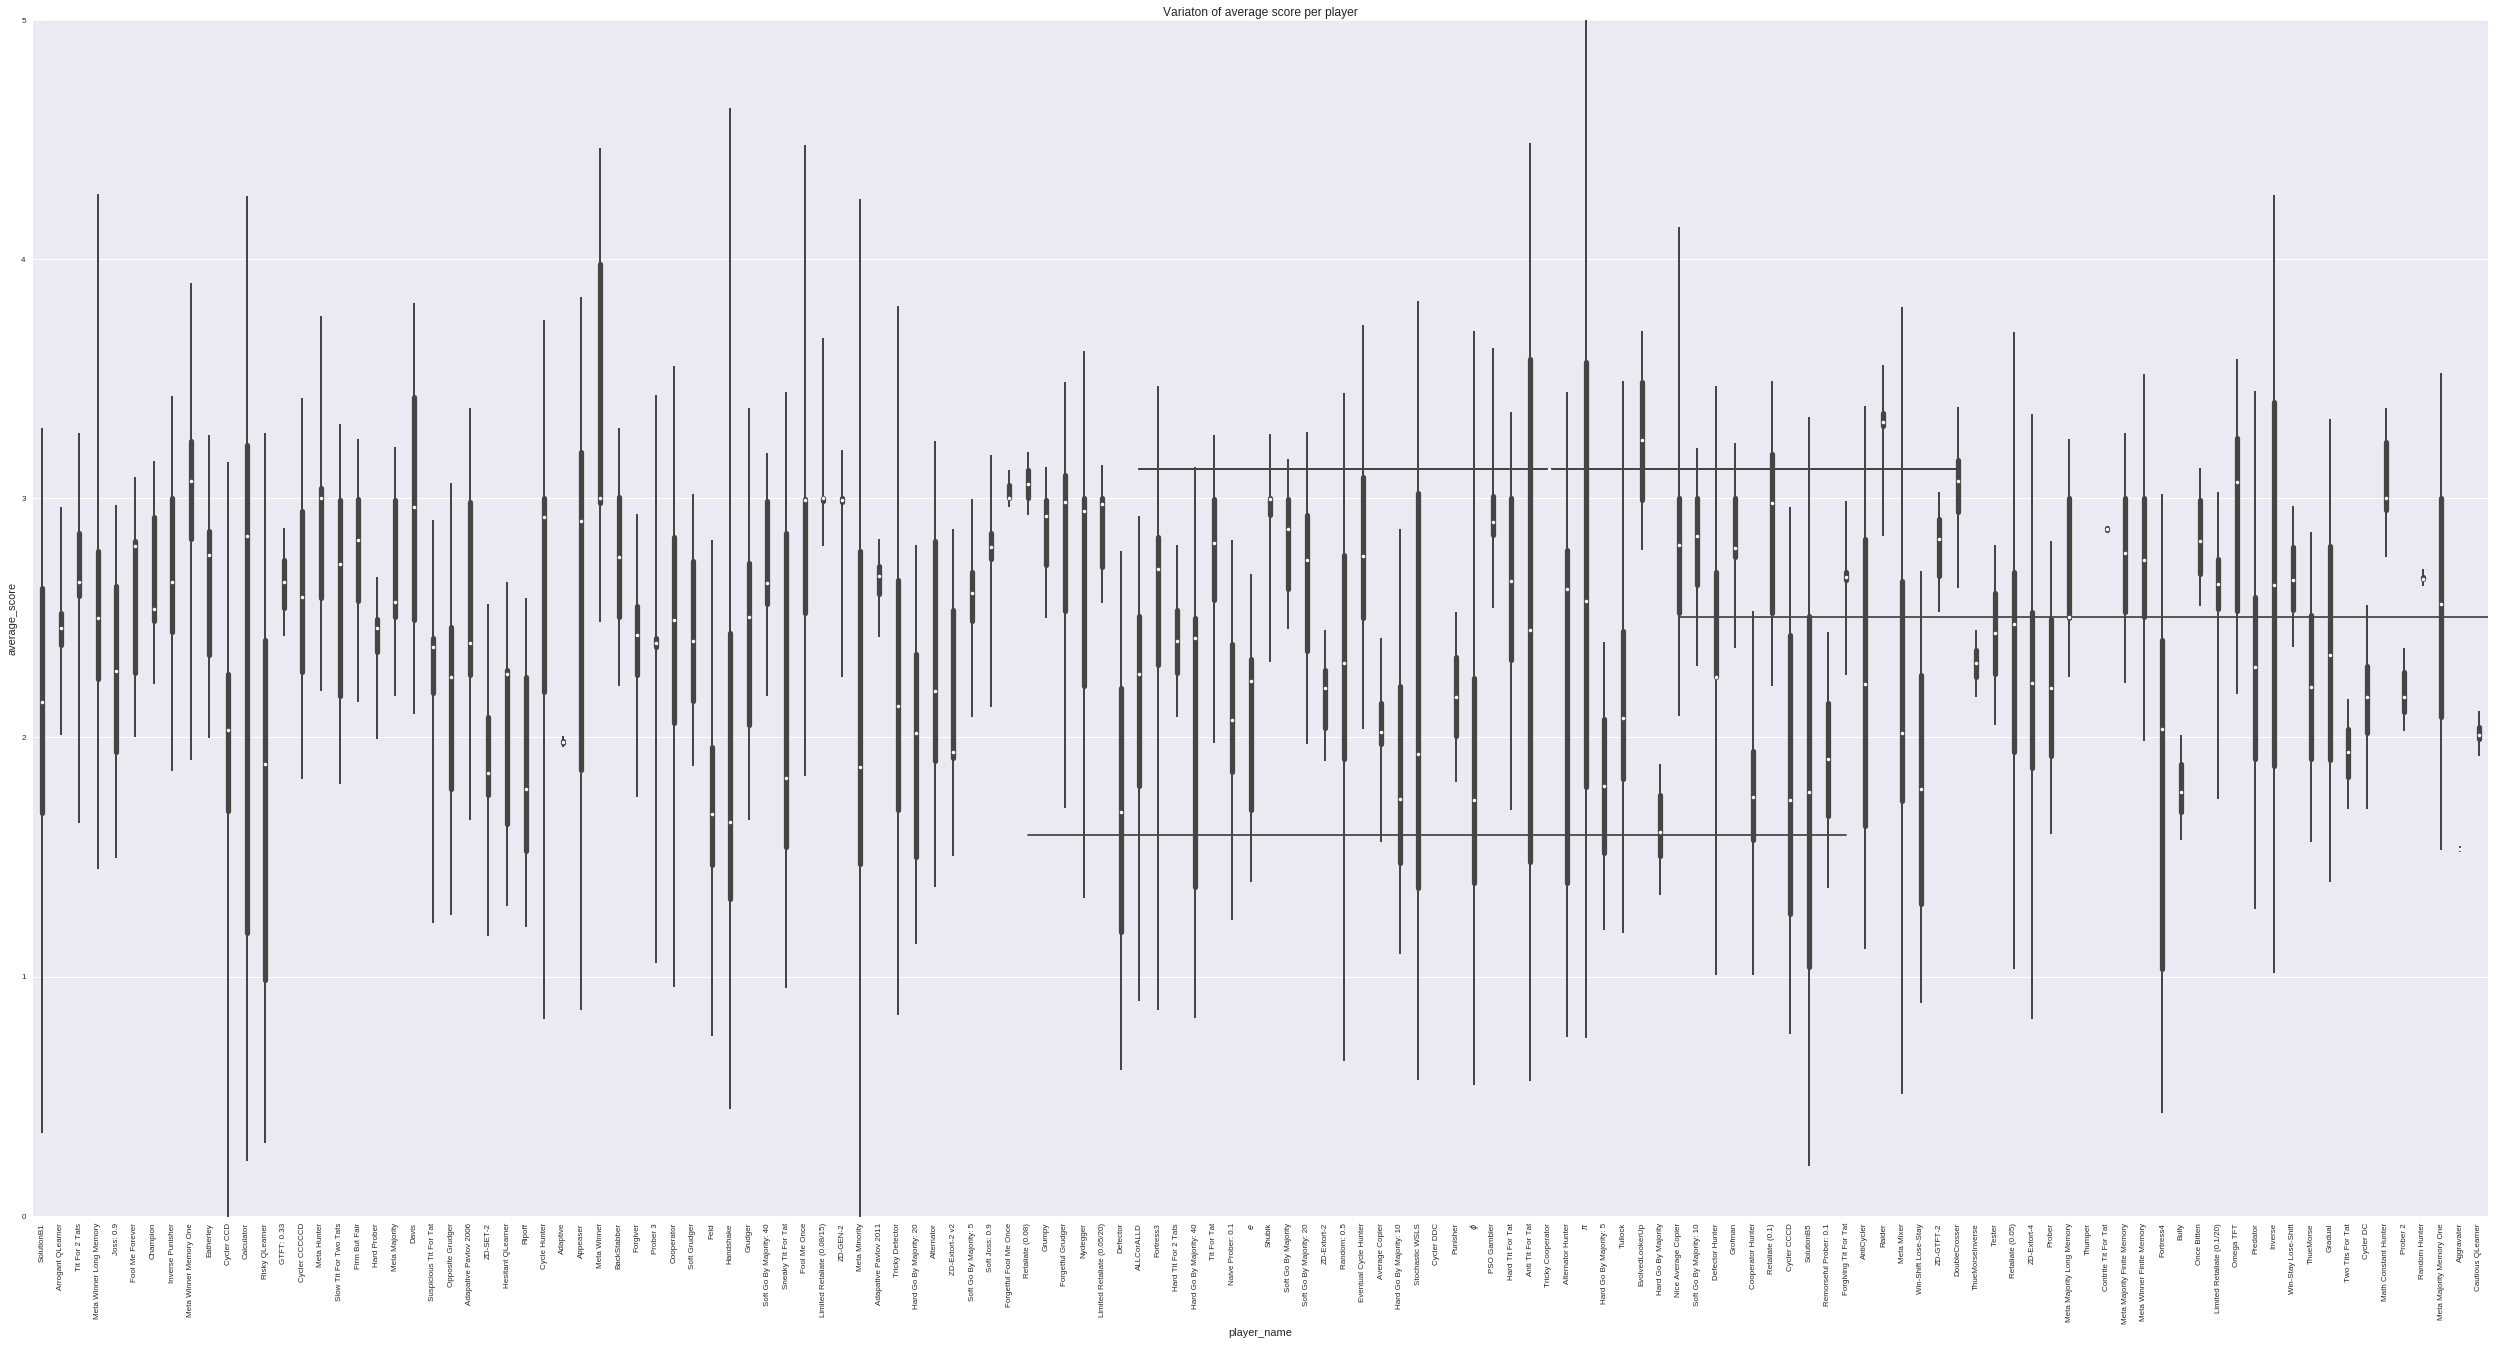

In [174]:
figure = plt.figure(figsize=(width, height))
plt.xticks(positions, names , rotation=90)
k=sns.violinplot(x="player_name", y="average_score", data=data, width = width,
               height = height, spacing = spacing, positions=positions, showextrema=False,sharex=True)

plt.ylim(0, 5)
plt.tick_params(axis='both', which='both', labelsize=8)
plt.title('Variaton of average score per player')
fig = k.get_figure()
fig.savefig('/home/nikoleta/src/jobs/Circle_5_players_Variaton of average score per player.png')

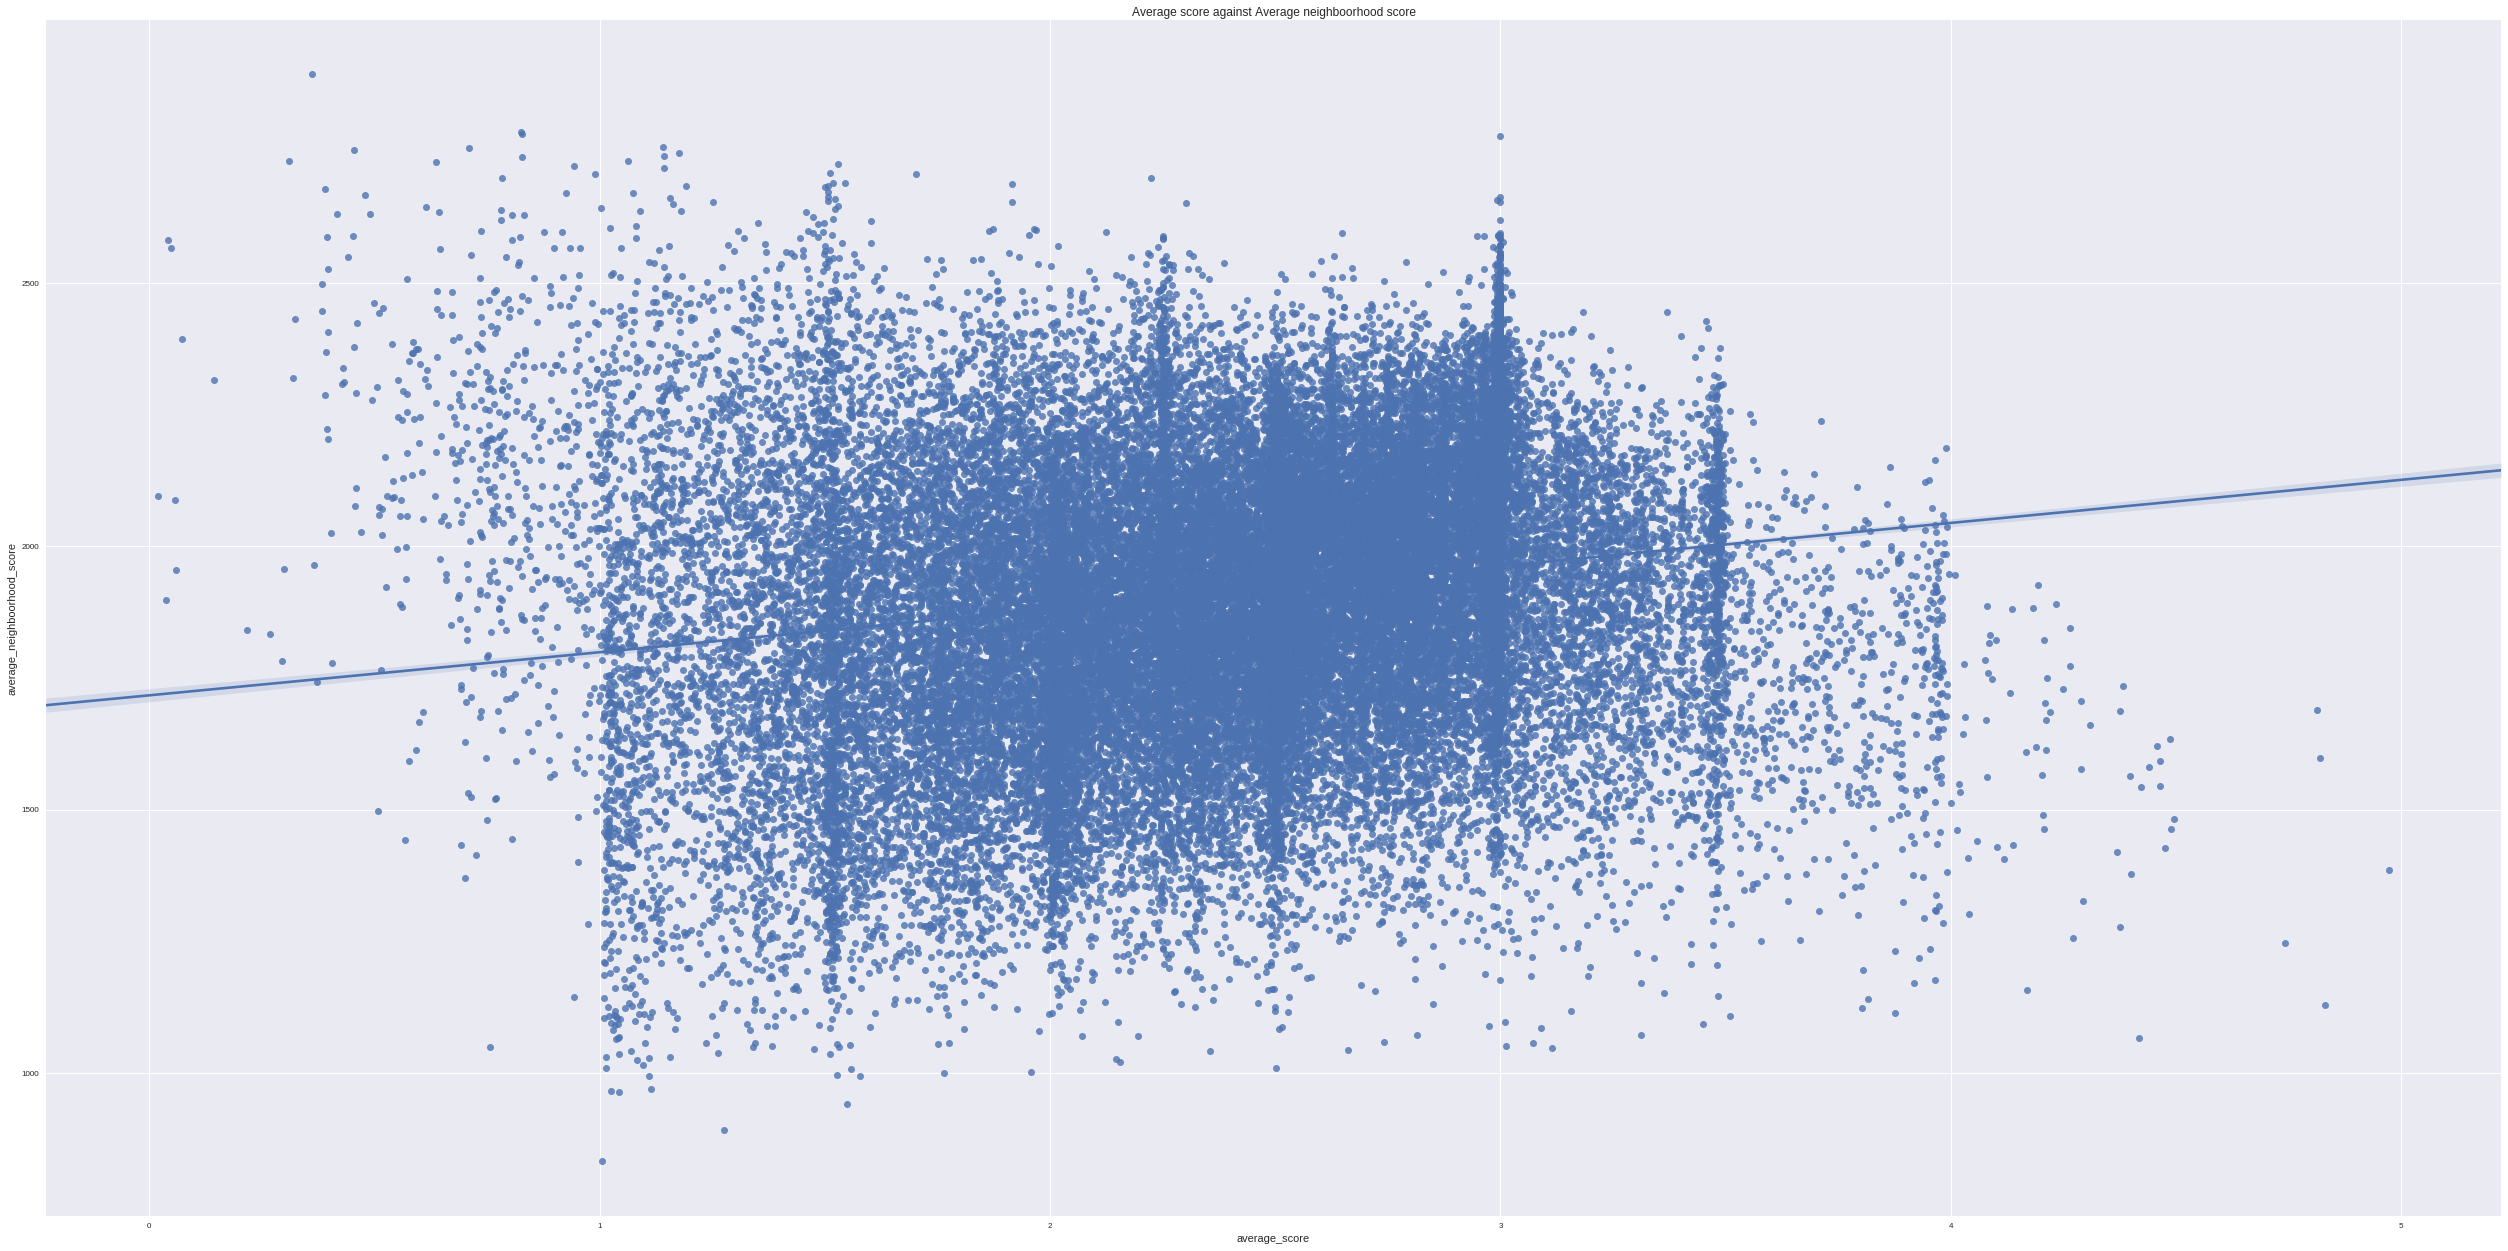

In [82]:
figure = plt.figure(figsize=(width, height))

plt.tick_params(axis='both', which='both', labelsize=8)

plot = sns.regplot(x='average_score', y='average_neighboorhood_score', data=data)
fig = plot.get_figure()
plt.title('Average score against Average neighboorhood score')
fig.savefig('/home/nikoleta/src/jobs/lattice-lines.png')

In [84]:
corr = data.corr(method='pearson') # a simple pearson correlation table
corr.to_csv("/home/nikoleta/Desktop/corr.csv")
corr

,seed,parameter,player_index,degree,neighborhood_size,ranking,average_score,average_neighboorhood_score,R,P,S,T,clustering,connectivity,freq
seed,1.000000,0.000000e+00,0.000000,NaN,NaN,0.000000,-0.010928,-0.019307,NaN,NaN,NaN,NaN,NaN,NaN,-1.524664e-02
parameter,0.000000,1.000000e+00,0.000000,NaN,NaN,0.000000,-0.000945,-0.002306,NaN,NaN,NaN,NaN,NaN,NaN,2.485476e-20
player_index,0.000000,0.000000e+00,1.000000,NaN,NaN,-0.000073,0.000939,-0.000350,NaN,NaN,NaN,NaN,NaN,NaN,2.615510e-03
degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ranking,0.000000,0.000000e+00,-0.000073,NaN,NaN,1.000000,-0.042675,-0.061590,NaN,NaN,NaN,NaN,NaN,NaN,-6.333097e-03
average_score,-0.010928,-9.447986e-04,0.000939,NaN,NaN,-0.042675,1.000000,0.180142,NaN,NaN,NaN,NaN,NaN,NaN,-5.838674e-03
average_neighboorhood_score,-0.019307,-2.305814e-03,-0.000350,NaN,NaN,-0.061590,0.180142,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-5.612217e-03
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
# regression 
rg= sm.ols(formula="average_score ~ degree + average_neighboorhood_score + connectivity + freq " , data=data).fit()

In [356]:
rg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     839.1
Date:                Mon, 01 Aug 2016   Prob (F-statistic):               0.00
Time:                        12:15:54   Log-Likelihood:                -43822.
No. Observations:               50000   AIC:                         8.765e+04
Df Residuals:                   49997   BIC:                         8.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       0.0502      0.001     58.871      0.000         0.049     0.052
degree                          0.2009      0.003     58.871      0.000         0.194     0.208
average_neighboorhood_score     0.0004   9.69e-06     40.943      0.000         0.000     0.000
connectivity                    0.2009      0.003     58.871      0.000         0.194     0.208
freq                        -5.972e-05   5.44e-05     -1.097      0.272        -0.000  4.69e-05
==============================================================================
Omnibus:                     1300.814   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1512.615
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       3.467   Cond. No.                     1.05e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.0b1-py3.5-linux-x86_64.egg/matplotlib/axes/_base.py:2835: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


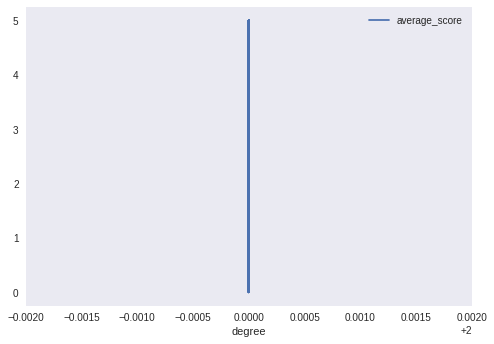

In [55]:
data.plot(x='degree' , y='average_score',  kind='line', grid=False)

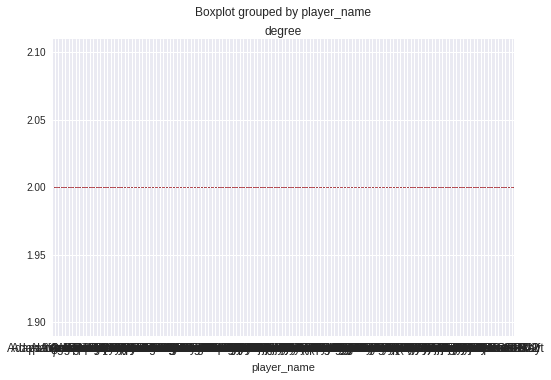

In [64]:
data.boxplot(column='degree', by='player_name')

In [364]:
robin = pd.read_csv("/home/nikoleta/src/jobs/data/Round_Robin_5_players.csv")

In [62]:
circle_winners = winning

In [88]:
lattice_winners = winning

In [89]:
from collections import Counter

In [359]:
x = Counter(robin['0']).items()
labels, values = zip(*x)

dict_items([('Contrite Tit For Tat', 1), ('Prober 2', 1), ('Arrogant QLearner', 2), ('Slow Tit For Two Tats', 3), ('Hard Prober', 1), ('Soft Go By Majority: 40', 1), ('Forgiving Tit For Tat', 2), ('Hard Tit For Tat', 1), ('Eventual Cycle Hunter', 1), ('Retaliate (0.1)', 1), ('Meta Minority', 1), ('Retaliate (0.05)', 1), ('ZD-GEN-2', 1), ('Nydegger', 2), ('PSO Gambler', 3), ('$\\pi$', 2), ('Random: 0.5', 1), ('Soft Go By Majority: 10', 1), ('Suspicious Tit For Tat', 1), ('Forgetful Grudger', 1), ('Defector Hunter', 2), ('Limited Retaliate (0.08/15)', 2), ('Hesitant QLearner', 1), ('Davis', 2), ('Raider', 1), ('Nice Average Copier', 1), ('Anti Tit For Tat', 1), ('Meta Majority Finite Memory', 1), ('Omega TFT', 1), ('Appeaser', 3), ('Alternator Hunter', 1), ('Hard Tit For 2 Tats', 1), ('Inverse', 1), ('Meta Winner', 1), ('Math Constant Hunter', 1), ('Adapative Pavlov 2006', 2), ('GTFT: 0.33', 1), ('Grofman', 1), ('Meta Winner Long Memory', 1), ('DoubleCrosser', 3), ('$\\phi$', 1), ('Coope

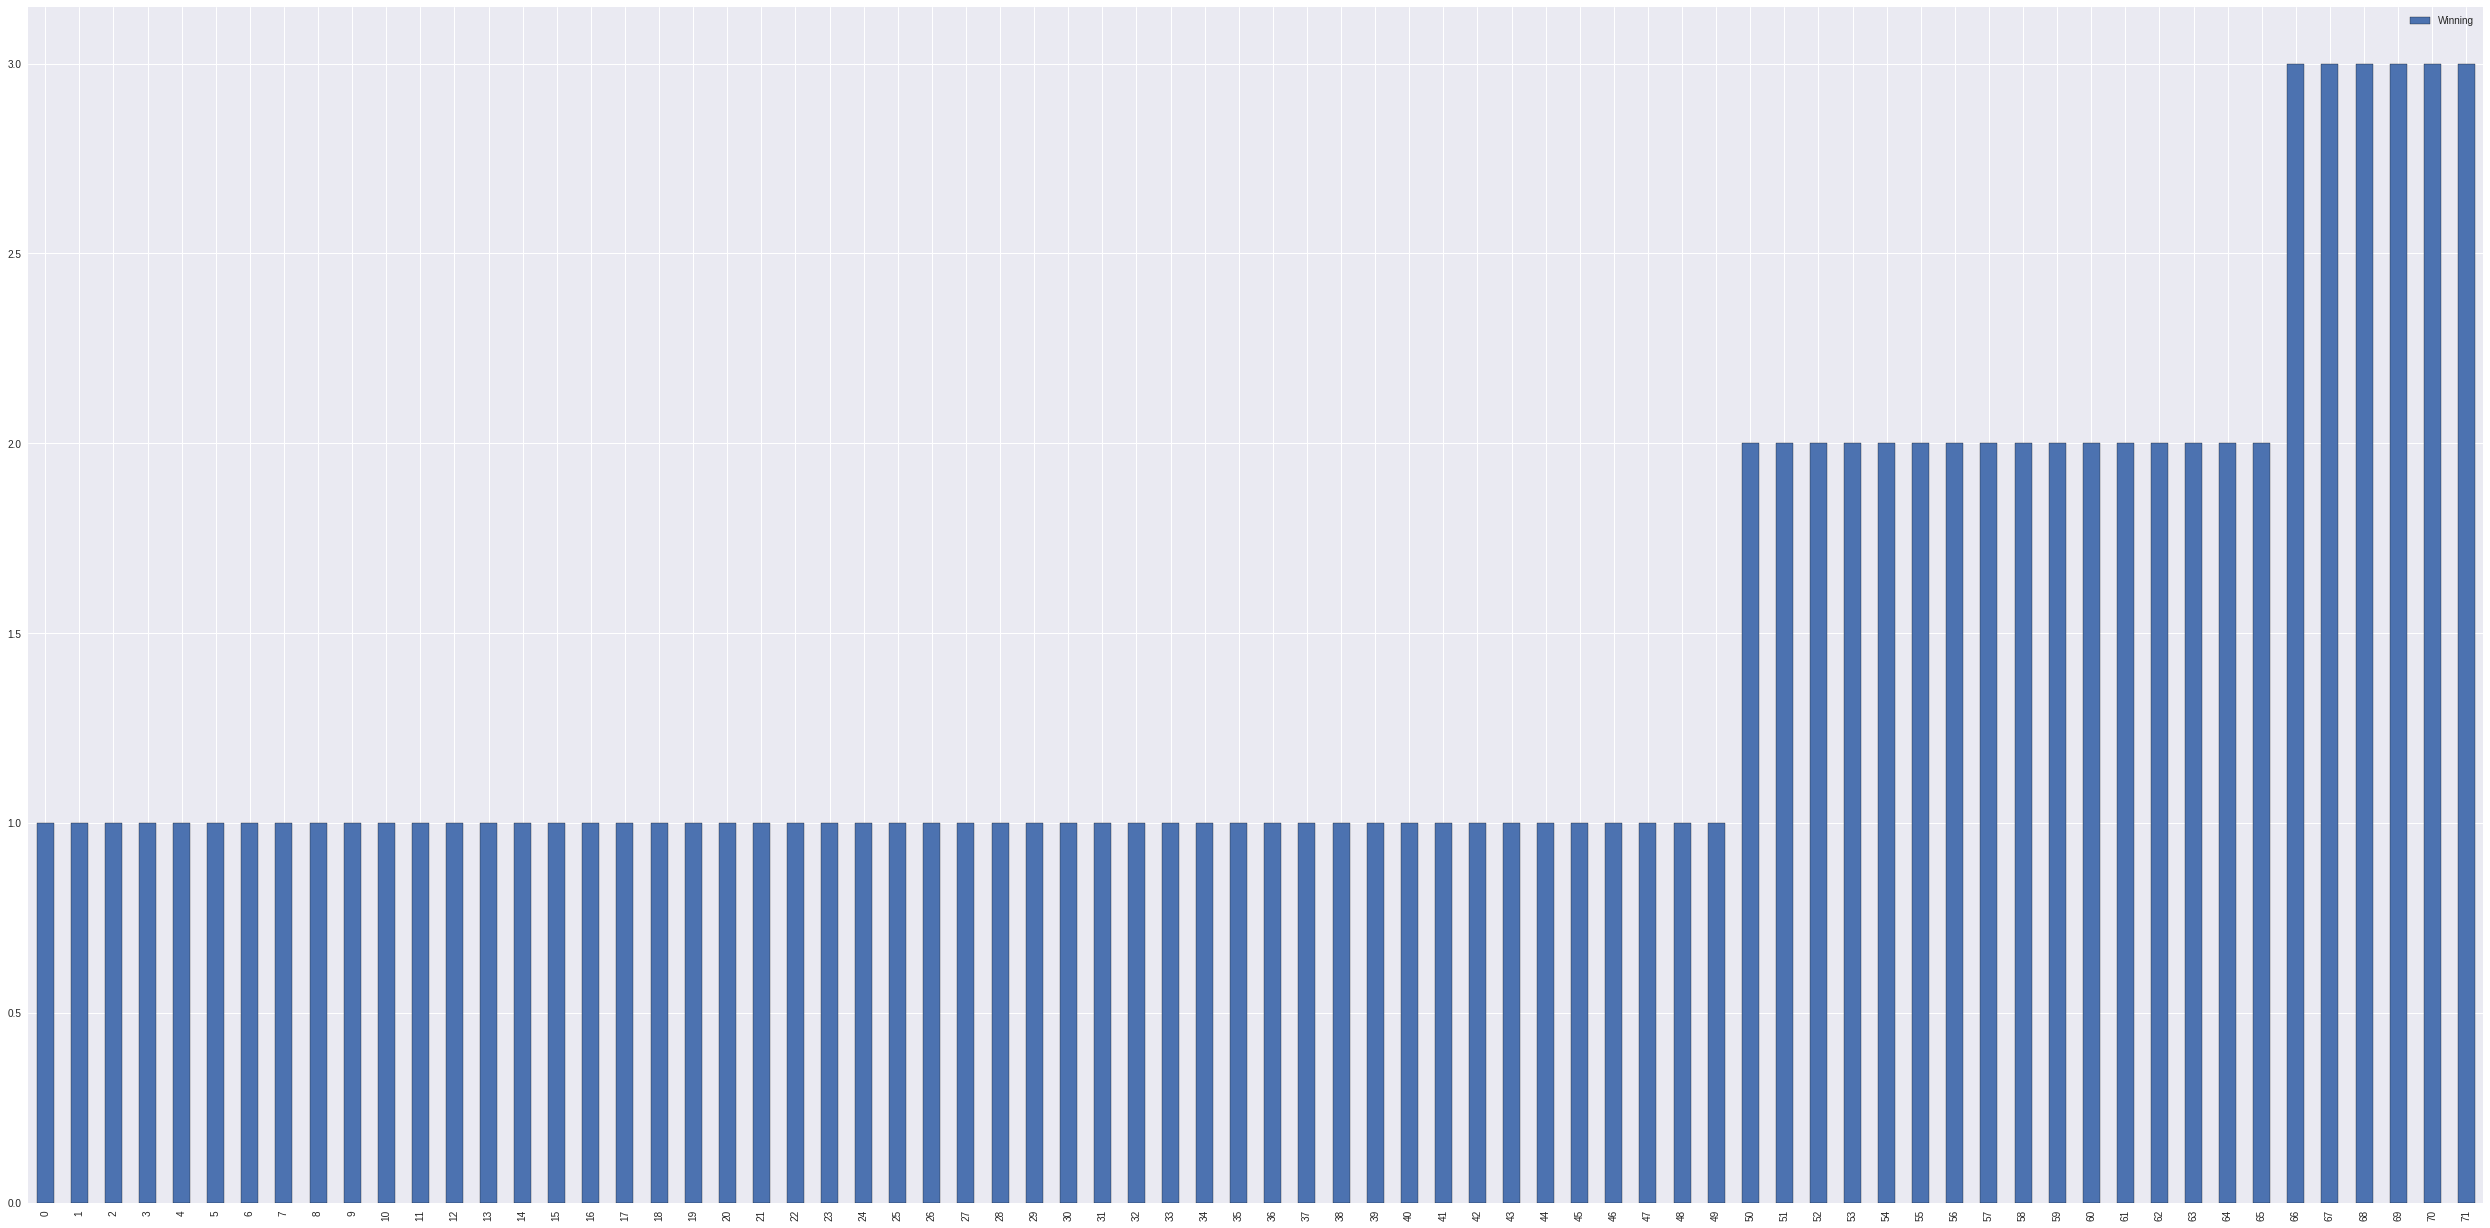

In [361]:
names = labels
winning = values

winning = pd.DataFrame({'Names' : names, 'Winning' : winning})

plot = winning.plot(kind='bar', figsize=(width, height))

plt.show()
